S03T02 - Normalizar ou padronizar colunas numéricas.

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
df_heart = pd.read_csv('heart_attack_prediction_dataset.csv')
df_heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
print(df_heart.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [6]:
# Separando a coluna 'Blood Pressure' em duas colunas
df_heart[['Systolic', 'Diastolic']] = df_heart['Blood Pressure'].str.split('/', expand=True)

# Convertendo para valores numéricos
df_heart['Systolic'] = pd.to_numeric(df_heart['Systolic'], errors='coerce')
df_heart['Diastolic'] = pd.to_numeric(df_heart['Diastolic'], errors='coerce')

print(df_heart[['Systolic', 'Diastolic']].head())

   Systolic  Diastolic
0       158         88
1       165         93
2       174         99
3       163        100
4        91         88


In [7]:
# Definindo as colunas a serem normalizadas
colunas_numericas = ['Systolic', 'Diastolic', 'Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides']

# Aplicando a normalização
scaler = MinMaxScaler()
df_heart[colunas_numericas] = scaler.fit_transform(df_heart[colunas_numericas])

print(df_heart[colunas_numericas].head())

   Systolic  Diastolic       Age  Cholesterol  Heart Rate       BMI  \
0  0.755556       0.56  0.680556     0.314286    0.457143  0.602363   
1  0.833333       0.66  0.041667     0.960714    0.828571  0.417945   
2  0.933333       0.78  0.041667     0.728571    0.457143  0.462573   
3  0.811111       0.80  0.916667     0.939286    0.471429  0.839394   
4  0.011111       0.56  0.666667     0.707143    0.757143  0.173077   

   Triglycerides  
0       0.332468  
1       0.266234  
2       0.723377  
3       0.451948  
4       0.261039  


In [8]:
# Aplicando a padronização
scaler = StandardScaler()
df_heart[colunas_numericas] = scaler.fit_transform(df_heart[colunas_numericas])

print(df_heart[colunas_numericas].head())

   Systolic  Diastolic       Age  Cholesterol  Heart Rate       BMI  \
0  0.870044   0.193782  0.625557    -0.641579   -0.147042  0.373454   
1  1.135714   0.534480 -1.539322     1.596895    1.118179 -0.268479   
2  1.477290   0.943319 -1.539322     0.793023   -0.147042 -0.113134   
3  1.059809   1.011458  1.425621     1.522691   -0.098380  1.198524   
4 -1.672797   0.193782  0.578495     0.718820    0.874867 -1.120826   

   Triglycerides  
0      -0.588539  
1      -0.816487  
2       0.756800  
3      -0.177339  
4      -0.834365  


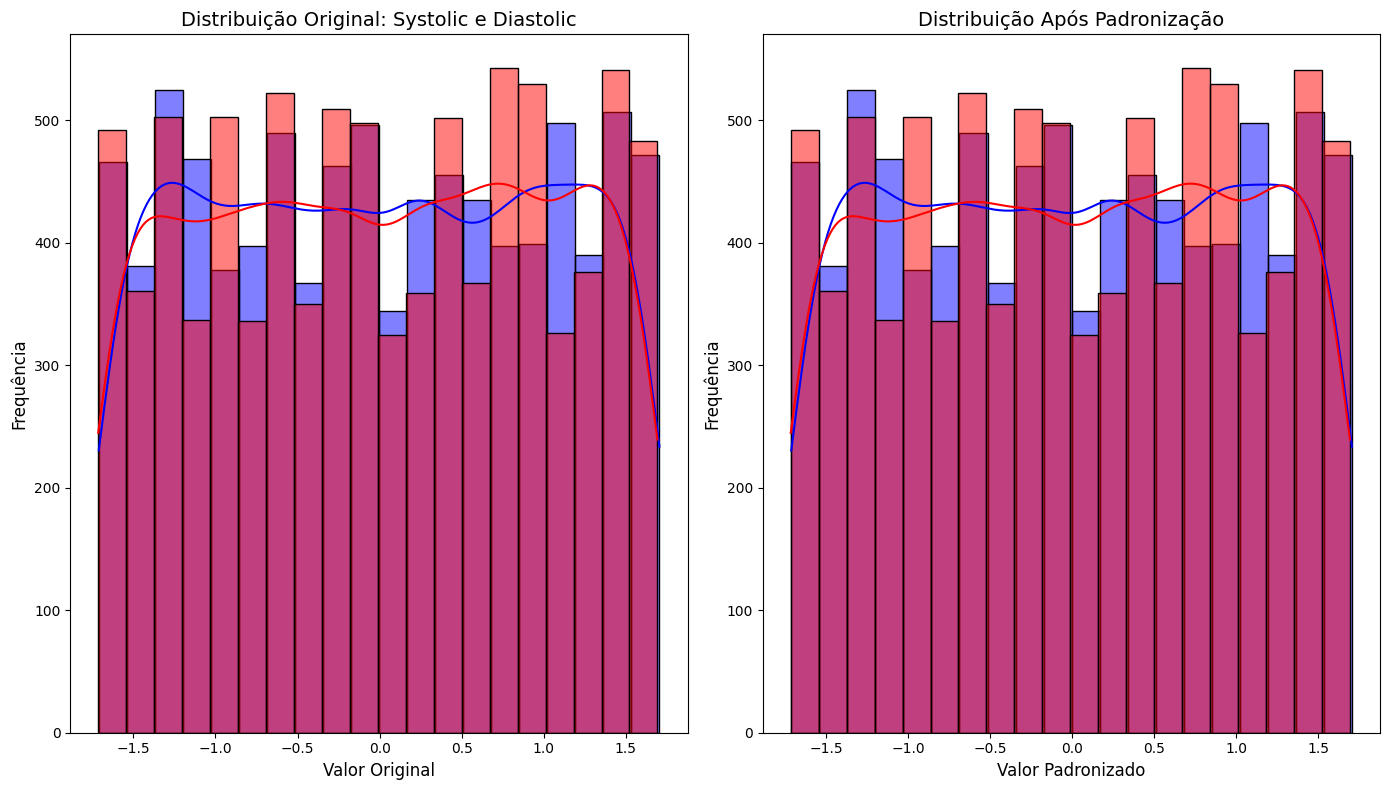

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o tamanho da figura
plt.figure(figsize=(14, 8))

# Plotando o histograma para as colunas antes da normalização/padronização
plt.subplot(1, 2, 1)
sns.histplot(df_heart['Systolic'], kde=True, color='blue', bins=20)
sns.histplot(df_heart['Diastolic'], kde=True, color='red', bins=20)
plt.title('Distribuição Original: Systolic e Diastolic', fontsize=14)
plt.xlabel('Valor Original', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Plotando o histograma para as colunas depois da normalização/padronização
plt.subplot(1, 2, 2)
sns.histplot(df_heart['Systolic'], kde=True, color='blue', bins=20)
sns.histplot(df_heart['Diastolic'], kde=True, color='red', bins=20)
plt.title('Distribuição Após Padronização', fontsize=14)
plt.xlabel('Valor Padronizado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [16]:
print(df_heart.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')
